<a href="https://colab.research.google.com/github/JhonyR28/Portafolio_JR_MachineLearning/blob/main/nobel_eda_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📊 Análisis de los Ganadores del Premio Nobel: Explorando Tendencias Históricas
Este notebook presenta un análisis exploratorio de datos centrado en los ganadores del Premio Nobel a lo largo de la historia. El objetivo principal es identificar patrones relevantes relacionados con el género, país de nacimiento, categorías premiadas, y la presencia de mujeres laureadas en distintas décadas.

Utilizando la biblioteca pandas y herramientas de visualización como seaborn, se desarrollaron consultas para responder preguntas clave como:

¿Cuál es el género y país de nacimiento más común entre los galardonados?

¿Qué década tuvo la mayor proporción de ganadores nacidos en Estados Unidos?

¿Qué combinación de década y categoría tuvo la mayor proporción de mujeres premiadas?

¿Quién fue la primera mujer en recibir un Nobel y en qué categoría?

¿Qué individuos u organizaciones han recibido más de un Premio Nobel?

Los resultados obtenidos permiten visualizar la evolución de la diversidad en los Nobel y resaltar casos excepcionales de laureados múltiples. Este análisis puede ser una base para estudios sociales, históricos o incluso para entrenar modelos predictivos basados en características demográficas de los ganadores.


In [ ]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.read_csv("data/nobel.csv")
print(df.columns)
print(df["category"].value_counts().index[0])
print(df["birth_country"].value_counts().index[0])
top_gender = df['sex'].value_counts().index[0]
top_country = df['birth_country'].value_counts().index[0]

print("\n The gender with the most Nobel laureates is :", top_gender)
print(" The most common birth country of Nobel laureates is :", top_country)

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')
Medicine
United States of America

 The gender with the most Nobel laureates is : Male
 The most common birth country of Nobel laureates is : United States of America


In [ ]:
df['decade'] = (df['year']//10)*10

In [ ]:
df['birth_country'] = df['birth_country'] == 'United States of America'

In [ ]:
df_usa = df[df['birth_country'] == True]
df_usa

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
35,1906,Peace,The Nobel Peace Prize 1906,NaN,1/1,470,Individual,Theodore Roosevelt,1858-10-27,"New York, NY",True,Male,NaN,NaN,NaN,1919-01-06,"Oyster Bay, NY",United States of America,1900
72,1912,Peace,The Nobel Peace Prize 1912,NaN,1/1,480,Individual,Elihu Root,1845-02-15,"Clinton, NY",True,Male,NaN,NaN,NaN,1937-02-07,"New York, NY",United States of America,1910
79,1914,Chemistry,The Nobel Prize in Chemistry 1914,"""in recognition of his accurate determinations...",1/1,175,Individual,Theodore William Richards,1868-01-31,"Germantown, PA",True,Male,Harvard University,"Cambridge, MA",United States of America,1928-04-02,"Cambridge, MA",United States of America,1910
95,1919,Peace,The Nobel Peace Prize 1919,NaN,1/1,483,Individual,Thomas Woodrow Wilson,1856-12-28,"Staunton, VA",True,Male,NaN,NaN,NaN,1924-02-03,"Washington, DC",United States of America,1910
117,1923,Physics,The Nobel Prize in Physics 1923,"""for his work on the elementary charge of elec...",1/1,28,Individual,Robert Andrews Millikan,1868-03-22,"Morrison, IL",True,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1953-12-19,"San Marino, CA",United States of America,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,2022,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for research on banks and financial crises""",1/3,1022,Individual,Douglas Diamond,1953-10-25,"Chicago, IL",True,Male,University of Chicago,"Chicago, IL",United States of America,NaN,NaN,NaN,2020
988,2022,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for research on banks and financial crises""",1/3,1023,Individual,Philip Dybvig,1955-05-22,"Gainesville, FL",True,Male,Washington University,"St. Louis, MO",United States of America,NaN,NaN,NaN,2020
990,2023,Medicine,The Nobel Prize in Physiology or Medicine 2023,"""for their discoveries concerning nucleoside b...",1/2,1025,Individual,Drew Weissman,1959-09-07,"Lexington, MA",True,Male,Penn Institute for RNA Innovations University ...,"Philadelphia, PA",United States of America,NaN,NaN,NaN,2020
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",True,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN,2020


In [ ]:
# Group by decade and calculate the mean of birth_country
decade_usa_ratio = df.groupby('decade', as_index=False)['birth_country'].mean()
print(decade_usa_ratio)
max_ratio = decade_usa_ratio['birth_country'].max()
max_decade_row = decade_usa_ratio[decade_usa_ratio['birth_country'] == max_ratio]
max_decade_usa3 = max_decade_row['decade'].values[0]
print(max_decade_usa3)
max_decade_usa = 2000

    decade  birth_country
0     1900       0.017544
1     1910       0.075000
2     1920       0.074074
3     1930       0.250000
4     1940       0.302326
5     1950       0.291667
6     1960       0.265823
7     1970       0.317308
8     1980       0.319588
9     1990       0.403846
10    2000       0.422764
11    2010       0.314050
12    2020       0.360000
2000


In [ ]:
print(df['sex'].unique())

['Male' 'Female' nan]


Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')
      

In [ ]:
df_women=df.copy()
df_women['sex'] = df['sex'] == 'Female'

In [ ]:
decade_women_ratio=df_women.groupby(['decade','category'], as_index=False)['sex'].mean()
a = decade_women_ratio['sex'].max()
decade_women_ratio_col=decade_women_ratio[decade_women_ratio['sex'] == a]
print(decade_women_ratio_col)
max_female_dict = {decade_women_ratio_col['decade'].values[0]:decade_women_ratio_col['category'].values[0]}
print(max_female_dict)

    decade    category  sex
68    2020  Literature  0.5
{2020: 'Literature'}


In [ ]:
decade_women_ratio.head()

,decade,category,sex
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923


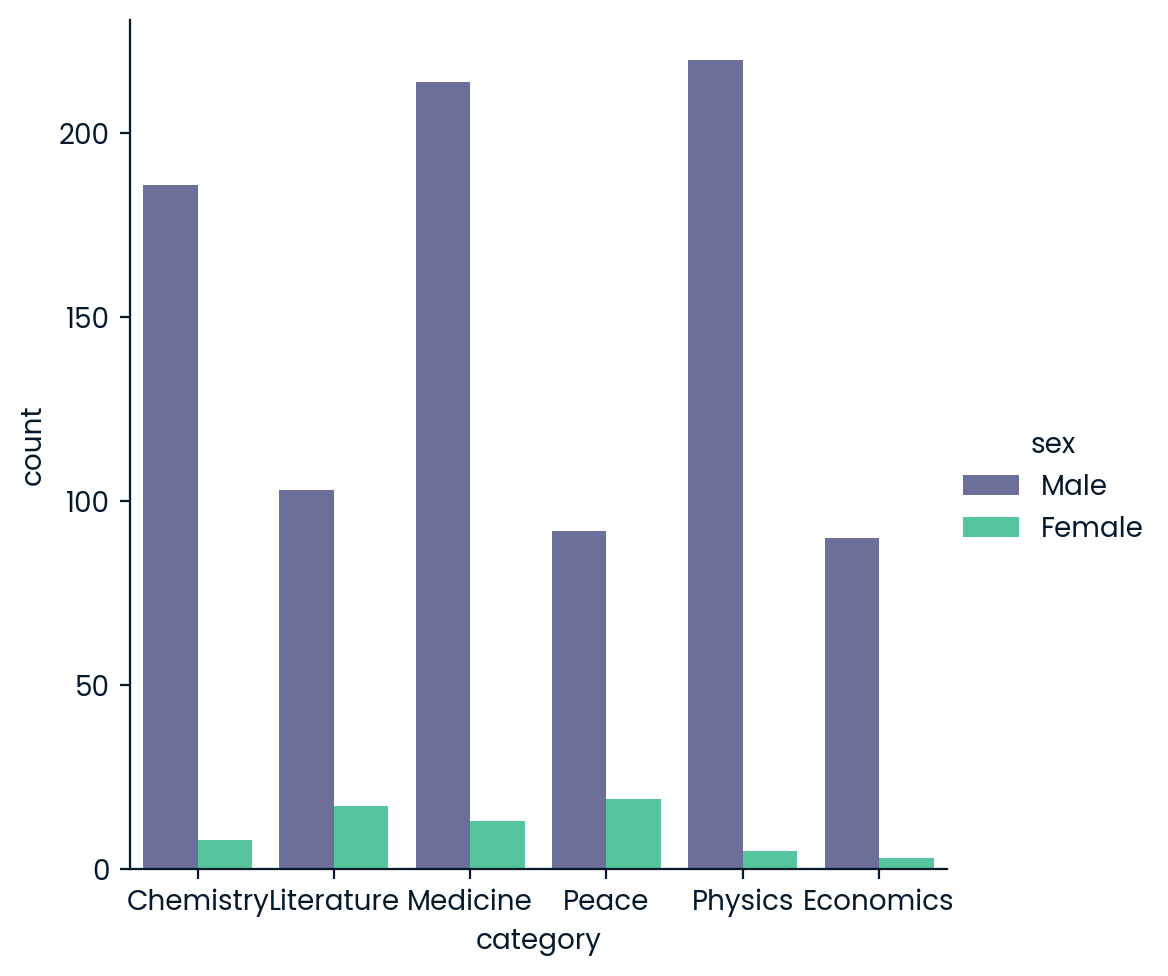

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='category',data=df,kind='count',hue='sex')

In [ ]:
decade_women_ratio

,decade,category,sex
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
67,2020,Economics,0.111111
68,2020,Literature,0.500000
69,2020,Medicine,0.125000
70,2020,Peace,0.285714


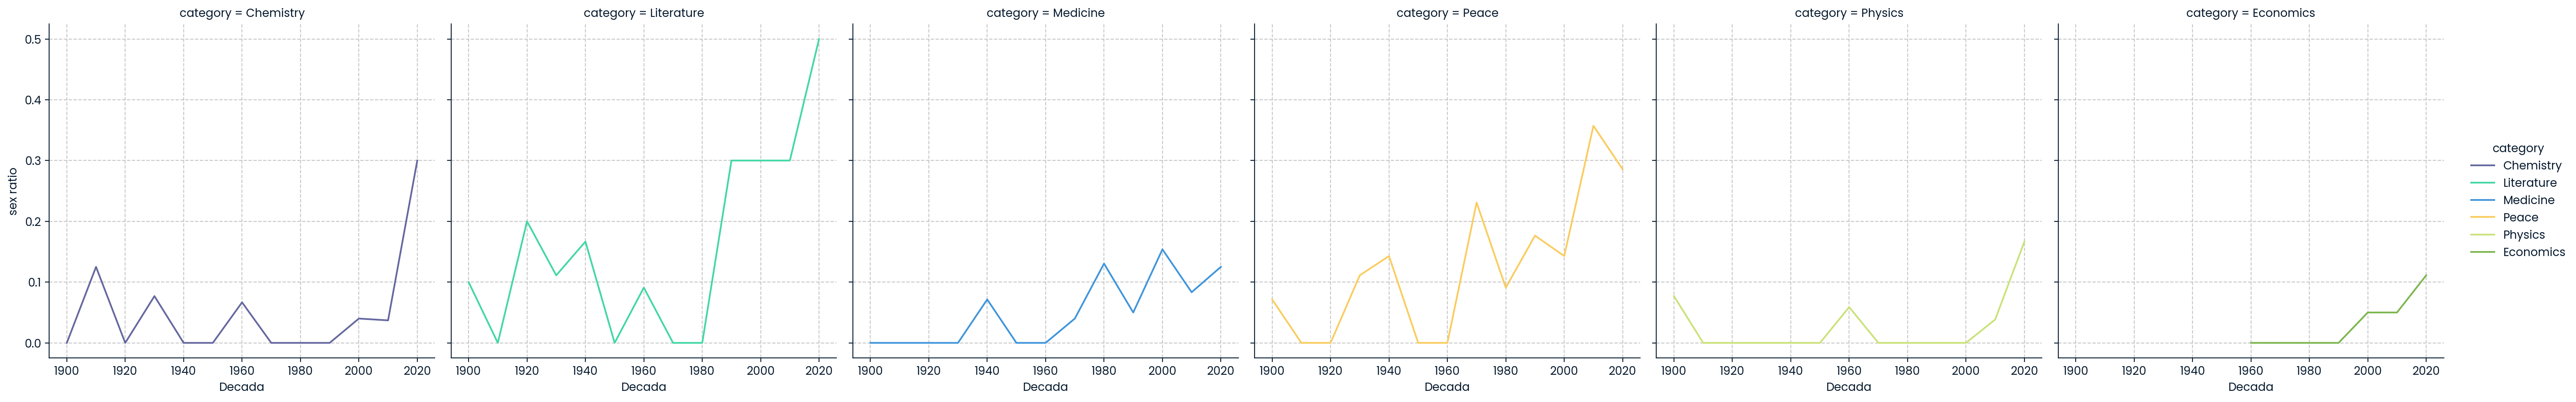

In [ ]:
g = sns.relplot(x='decade',y='sex',data=decade_women_ratio,kind='line',hue='category',col='category')
g.set(xlabel='Decada',ylabel="sex ratio")
for ax in g.axes.flat:
    ax.grid(True, linestyle='--', alpha=0.7)  # Ajusta el estilo aquí
plt.show()

In [ ]:
df_women = df_women[df_women['sex'] == True]

In [ ]:
min_year = df_women['year'].min()
print(min_year)
print(df_women[df_women['year']==min_year]['full_name'].values[0],df_women[df_women['year']==min_year]['category'].values[0])


1903
Marie Curie, née Sklodowska Physics


In [ ]:
first_woman_name = df_women[df_women['year']==min_year]['full_name'].values[0]
first_woman_category = df_women[df_women['year']==min_year]['category'].values[0]

In [ ]:
counts = df['full_name'].value_counts()
counts_above_2 = counts[counts >= 2].index

In [ ]:
list(counts_above_2)

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']

In [ ]:
repeat_list = ['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']